## Packages

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
data_hour = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/data_hour_for_analysis.csv')

In [72]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47336 entries, 0 to 47335
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date_dt     47336 non-null  object
 1   year        47336 non-null  int64 
 2   month       47336 non-null  int64 
 3   day         47336 non-null  int64 
 4   timestamp   43528 non-null  object
 5   species     47336 non-null  object
 6   direction1  47336 non-null  int64 
 7   direction2  47336 non-null  int64 
 8   local       47336 non-null  int64 
 9   age         9478 non-null   object
 10  sex         3455 non-null   object
 11  plumage     920 non-null    object
dtypes: int64(6), object(6)
memory usage: 4.3+ MB


In [73]:
data_hour.age.unique()


array([nan, '1', 'I', 'A', 'S', 'J', '4', '3', '2', 'Non-Juv',
       'non_adult'], dtype=object)

In [74]:
# How many species have sex info?
data_hour_age = data_hour[['date_dt', 'timestamp','species', 'age', 'direction1']].dropna()
data_hour_age = data_hour_age.loc[data_hour_age['direction1'] > 0]
data_hour_age.species.unique()

array(['Milan noir', 'Bondrée apivore', 'Busard des roseaux',
       'Cigogne noire', 'Balbuzard pêcheur', 'Busard cendré',
       'Circaète Jean-le-Blanc', 'Buse variable', 'laridé spec.',
       'Busard Saint-Martin/cendré/pâle', 'Busard Saint-Martin',
       'Faucon d’Éléonore', 'Épervier d’Europe', 'Aigle botté',
       'Busard cendré/pâle', 'Faucon hobereau', 'Vautour percnoptère',
       'Grand Cormoran', 'Martinet noir', 'Cigogne blanche',
       'Busard pâle', 'Faucon crécerelle', 'Coucou gris', 'Milan royal',
       'rapace spec.', 'Élanion blac', 'Faucon émerillon', 'Héron cendré',
       'Vanneau huppé', 'Faucon crécerellette', 'Bécasseau variable',
       'Autour des palombes', 'Labbe à longue queue', 'Goéland leucophée',
       'Faucon crécerelle / Faucon crécerellette'], dtype=object)

In [75]:
data_hour_sex = data_hour[['date_dt', 'timestamp','species', 'sex', 'direction1']].dropna()
data_hour_sex = data_hour_sex.loc[data_hour_sex['direction1'] > 0]
data_hour_sex.species.unique()

array(['Busard des roseaux', 'Busard cendré', 'Balbuzard pêcheur',
       'Busard Saint-Martin', 'Épervier d’Europe', 'busard spec.',
       'Autour des palombes', 'Bondrée apivore',
       'Busard Saint-Martin/cendré/pâle', 'Faucon crécerelle',
       'Busard cendré/pâle', 'Busard pâle', 'Aigle botté',
       'Faucon émerillon', 'Circaète Jean-le-Blanc',
       'Faucon crécerellette', 'Loriot d’Europe', 'Souci',
       'Faucon crécerelle / Faucon crécerellette', 'Citron',
       'Coucou gris', 'Bruant ortolan'], dtype=object)

In [76]:
data_hour_plumage = data_hour[['date_dt', 'timestamp','species', 'plumage', 'direction1']].dropna()
data_hour_plumage = data_hour_plumage.loc[data_hour_plumage['direction1'] > 0]
data_hour_plumage.species.unique()

array(['Aigle botté', 'Cigogne noire', 'Milan noir', 'Faucon d’Éléonore',
       'Bondrée apivore', 'Busard des roseaux', 'Buse variable'],
      dtype=object)

In [77]:
# Plus
# Milan noir: âge
# Bondrée apivore: âge, sex
# Aigle boté plumage

## Milan noir

In [78]:
milan_noir_age = data_hour_age[data_hour_age['species'].isin(['Milan noir'])]
milan_noir_age

,date_dt,timestamp,species,age,direction1
5,2011-01-09,13:30:00,Milan noir,1,1
6,2011-01-09,11:25:00,Milan noir,I,2
104,2011-02-09,13:50:00,Milan noir,I,1
108,2011-02-09,13:50:00,Milan noir,1,1
326,2011-06-09,12:25:00,Milan noir,1,3
...,...,...,...,...,...
47266,2023-12-08,13:03:46,Milan noir,I,4
47267,2023-12-08,13:03:51,Milan noir,1,1
47270,2023-12-08,13:29:08,Milan noir,1,3
47271,2023-12-08,13:29:12,Milan noir,I,4


In [79]:
n_obs_age_milan_noir = milan_noir_age.groupby(['age'])['direction1'].sum().reset_index()
n_obs_age_milan_noir

,age,direction1
0,1,6551
1,2,25
2,A,3298
3,I,13582
4,J,1404
5,Non-Juv,126


<Figure size 1000x500 with 0 Axes>

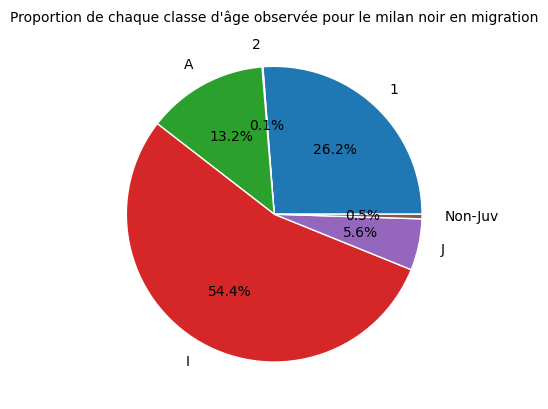

In [123]:
# Figure all years
plt.figure(figsize=(10,5))

fig, ax = plt.subplots()
ax.pie(n_obs_age_milan_noir.direction1,
       labels=n_obs_age_milan_noir.age,
       labeldistance=1.15,
       autopct='%1.1f%%',  # Add percentage labels
       wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

plt.title("Proportion de chaque classe d'âge observée pour le milan noir en migration", fontsize=10);

plt.savefig('../figures/age_sex_plumage/age/prop_age_milan_noir_migration.png')

## Bondrée apivore

### Age

In [95]:
bondree_age = data_hour_age[data_hour_age['species'].isin(['Bondrée apivore'])]
bondree_age

,date_dt,timestamp,species,age,direction1
18,2011-01-09,18:05:00,Bondrée apivore,1,1
19,2011-01-09,17:55:00,Bondrée apivore,1,1
60,2011-01-09,16:00:00,Bondrée apivore,1,1
68,2011-01-09,16:15:00,Bondrée apivore,1,1
74,2011-01-09,11:10:00,Bondrée apivore,A,2
...,...,...,...,...,...
47037,2023-11-09,10:30:09,Bondrée apivore,1,1
47261,2023-12-08,13:00:59,Bondrée apivore,A,1
47274,2023-12-08,11:45:00,Bondrée apivore,A,1
47275,2023-12-08,12:51:54,Bondrée apivore,A,1


In [96]:
n_obs_age_bondree = bondree_age.groupby(['age'])['direction1'].sum().reset_index()
n_obs_age_bondree

,age,direction1
0,1,553
1,A,1833
2,I,28
3,J,73
4,Non-Juv,5


<Figure size 1000x500 with 0 Axes>

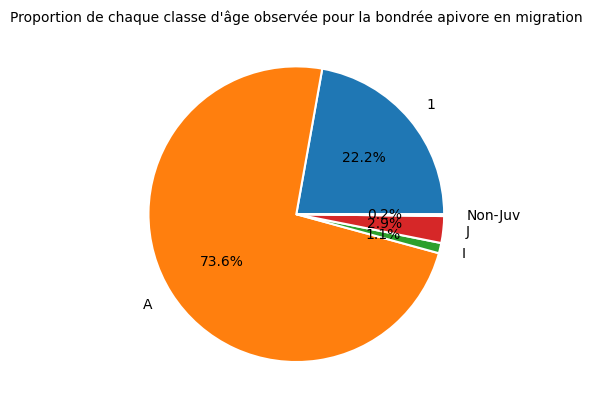

In [107]:
# Figure all years
plt.figure(figsize=(10,5))

fig, ax = plt.subplots();

ax.pie(n_obs_age_bondree.direction1,
       labels=n_obs_age_bondree.age,
       labeldistance=1.15,
       autopct='%1.1f%%',  # Add percentage labels
       wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'});

plt.title("Proportion de chaque classe d'âge observée pour la bondrée apivore en migration", fontsize=10);

plt.savefig('../figures/age_sex_plumage/age/prop_age_bondree_apivore_migration.png')

### Sex

In [109]:
bondree_sex = data_hour_sex[data_hour_sex['species'].isin(['Bondrée apivore'])]
bondree_sex

,date_dt,timestamp,species,sex,direction1
6557,2017-02-08,15:40:00,Bondrée apivore,F,1
6823,2017-03-08,13:50:17,Bondrée apivore,F,1
7166,2017-05-09,11:30:59,Bondrée apivore,F,1
7178,2017-05-09,12:21:34,Bondrée apivore,M,1
7219,2017-05-09,09:43:21,Bondrée apivore,FC,1
...,...,...,...,...,...
46993,2023-11-09,11:41:27,Bondrée apivore,FC,1
46999,2023-11-09,11:41:14,Bondrée apivore,M,2
47261,2023-12-08,13:00:59,Bondrée apivore,F,1
47274,2023-12-08,11:45:00,Bondrée apivore,M,1


In [111]:
n_obs_sex_bondree = bondree_sex.groupby(['sex'])['direction1'].sum().reset_index()
n_obs_sex_bondree

,sex,direction1
0,F,703
1,FC,15
2,M,550


<Figure size 1000x500 with 0 Axes>

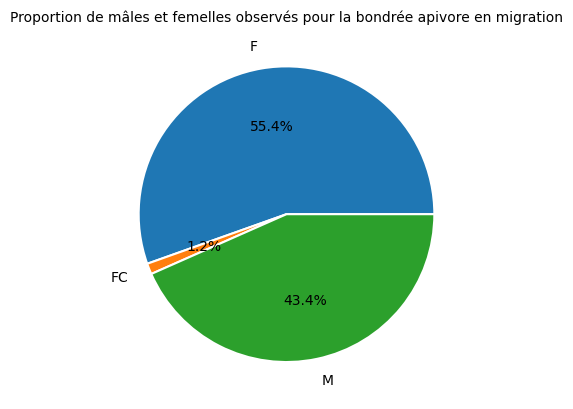

In [122]:
# Figure all years
plt.figure(figsize=(10,5))

fig, ax = plt.subplots();

ax.pie(n_obs_sex_bondree.direction1,
       labels=n_obs_sex_bondree.sex,
       labeldistance=1.15,
       autopct='%1.1f%%',  # Add percentage labels
       wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'});

plt.title("Proportion de mâles et femelles observés pour la bondrée apivore en migration", fontsize=10);

plt.savefig('../figures/age_sex_plumage/sex/prop_sex_bondree_apivore_migration.png')

### Aigle botté

In [116]:
aigle_bote_plumage = data_hour_plumage[data_hour_plumage['species'].isin(['Aigle botté'])]

In [117]:
aigle_bote_plumage

,date_dt,timestamp,species,plumage,direction1
26,2011-01-09,16:50:00,Aigle botté,D,1
5975,2016-09-21,10:23:59,Aigle botté,L,8
5980,2016-09-21,10:24:09,Aigle botté,D,4
5998,2016-09-22,10:30:31,Aigle botté,L,2
6000,2016-09-22,10:30:26,Aigle botté,D,3
...,...,...,...,...,...
45259,2023-09-29,14:21:33,Aigle botté,D,1
45261,2023-09-29,13:27:37,Aigle botté,D,1
45750,2023-10-09,14:29:19,Aigle botté,D,1
46130,2023-10-16,16:15:29,Aigle botté,D,1


In [118]:
n_obs_aigle_botte_plumage = aigle_bote_plumage.groupby(['plumage'])['direction1'].sum().reset_index()
n_obs_aigle_botte_plumage

,plumage,direction1
0,D,193
1,I,5
2,L,303


<Figure size 1000x500 with 0 Axes>

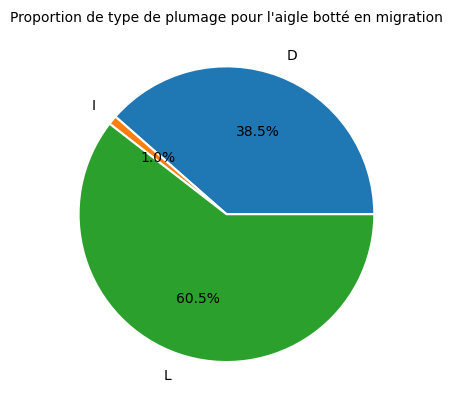

In [121]:
# Figure all years
plt.figure(figsize=(10,5))

fig, ax = plt.subplots();

ax.pie(n_obs_aigle_bote_plumage.direction1,
       labels=n_obs_aigle_bote_plumage.plumage,
       labeldistance=1.15,
       autopct='%1.1f%%',  # Add percentage labels
       wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'});

plt.title("Proportion de type de plumage pour l'aigle botté en migration", fontsize=10);

plt.savefig('../figures/age_sex_plumage/plumage/prop_plumage_aigle_botté.png')